In [3]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 22:20:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/19 22:20:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
df = spark.read.csv('diabetes_012_health_indicators_BRFSS2015.csv', header=True, inferSchema=True)

df_1 = spark.read.csv('binary_data.csv', header=True, inferSchema=True)
df_2 = spark.read.csv('nominal_data.csv', header=True, inferSchema=True)

In [5]:
binary_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex']
nominal_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age',
       'Education', 'Income']

In [12]:
df.printSchema()
df_1.printSchema()
df_2.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- Diabetes_012: string (nullable = true)
 |-- HighB

In [6]:
df.describe(binary_cols[0:5]).show()
df.describe(binary_cols[5:10]).show()
df.describe(binary_cols[10:15]).show()
df.describe(nominal_cols[0:4]).show()
df.describe(nominal_cols[4:7]).show()

+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|       Diabetes_012|             HighBP|           HighChol|          CholCheck|             Smoker|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|             253680|             253680|             253680|             253680|             253680|
|   mean|0.29692131819615264| 0.4290011037527594| 0.4241209397666351| 0.9626695048880479|0.44316855881425415|
| stddev| 0.6981597284090991|0.49493446268990043|0.49420980465688596|0.18957075436272514| 0.4967606667785607|
|    min|                0.0|                0.0|                0.0|                0.0|                0.0|
|    max|                2.0|                1.0|                1.0|                1.0|                1.0|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+

+-------+

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: 'DataFrame' object has no attribute 'get'

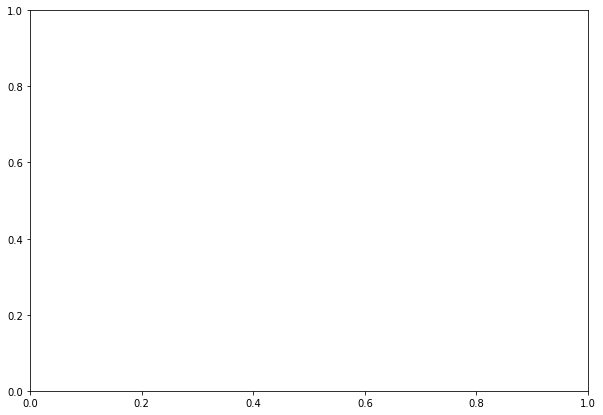

In [13]:
# Distribtuion for target variable Diabetes_012
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='Diabetes_012', data=df)
graph.set_title("Distribtuion for variable Diabetes_012")
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
    df['Diabetes_012'].value_counts()[i],ha="center")
    i += 1